In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

log_dir = os.path.join('logs', '2022-03-04')
log_file = os.path.join(log_dir, 'log_2022-03-04-22-49-40_train.sample.csv_e5_b1.csv')

def visualize(log_path):
    log_df = pd.read_csv(log_path)
    epoch = list(log_df['epoch'].unique())
    epochs = [i for i in range(len(epoch))]
    subplot_id = 320
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)

    for e in epochs:
        e_df = log_df[log_df['epoch'] == e]
        len_e = len(e_df)
        loss_prom = list(e_df['loss_prom'])
        loss_ss = list(e_df['loss_ss'])
        loss_polya = list(e_df['loss_polya'])
        steps = [(k+1) for k in range(0, len_e)]
        subplot_id += 1
        ax = fig.add_subplot(subplot_id)
        ax.plot(steps, loss_prom, label='loss prom')
        ax.plot(steps, loss_ss, label='loss ss')
        ax.plot(steps, loss_polya, label='loss polya')
        ax.set_title('epoch {}'.format(e+1))
        ax.set_xlabel('steps')
        ax.set_ylabel('loss')
        ax.legend()
        
    plt.subplots_adjust(top=1.5, bottom=1, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
    plt.show()



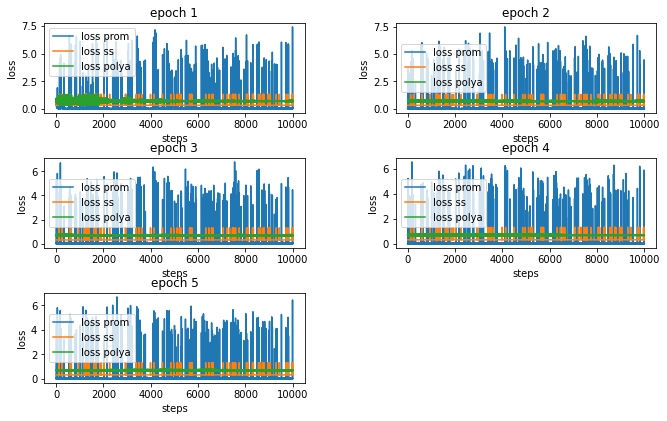

In [4]:
visualize(log_file)

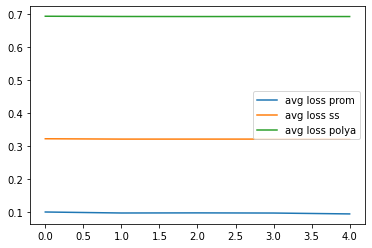

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
def visualize_avg_loss_per_epoch(log_path):
    if not os.path.exists(log_path):
        raise FileNotFoundError("File {} not found.".format(log_path))

    df = pd.read_csv(log_path)
    epochs = list(df['epoch'].unique())
    avg_loss_prom_by_epoch = []
    avg_loss_ss_by_epoch = []
    avg_loss_polya_by_epoch = []
    for e in epochs:
        edf = df[df['epoch'] == e]
        avg_loss_prom_by_epoch.append(edf['loss_prom'].mean())
        avg_loss_ss_by_epoch.append(edf['loss_ss'].mean())
        avg_loss_polya_by_epoch.append(edf['loss_polya'].mean())

    fig, ax = plt.subplots()
    ax.plot(epochs, avg_loss_prom_by_epoch, label="avg loss prom")
    ax.plot(epochs, avg_loss_ss_by_epoch, label="avg loss ss")
    ax.plot(epochs, avg_loss_polya_by_epoch, label="avg loss polya")   
    ax.legend()

    plt.show()

log_dir = os.path.join('logs', '2022-03-05')
log_file = os.path.join(log_dir, 'log_2022-03-05-11-27-49_train.sample.csv_e5_b1_sum.csv')
visualize_avg_loss_per_epoch(log_file)
